In [12]:
from mip import *
import datetime
import pandas as pd
import numpy as np
from EMS import *

## PARAMETERs for EMS econ and RE
for battery, uncomment the one you want to use and comment others to use them

# 1 battery

In [13]:
# # test for 1 batt OK !
# PARAM = {}
# # add length check with res & horizon
# PARAM['Horizon'] = 3*24*60        # horizon to optimize (min)
# PARAM['Resolution'] = 15    # sampling period(min)
# PARAM['PV_capacity'] = 50   # (kw) PV sizing for this EMS
# TOU = getBuySellrate(Resolution=PARAM['Resolution'],
#                                     Horizon=PARAM['Horizon'],
#                                     TOU_CHOICE='THcurrent',
#                                     start_time=datetime.timedelta(minutes=0))
# PARAM['Buy_rate'] = TOU['buy'].to_numpy()
# PARAM['Sell_rate'] = TOU['sell'].to_numpy()
# PARAM['Start_date'] =  pd.to_datetime('2023-04-18 00:00:00')
# PARAM['battery'] = {}
# PARAM['battery']['charge_effiency'] = [0.95];              #  bes charge eff
# PARAM['battery']['discharge_effiency'] = [0.95*0.93]; #  bes discharge eff note inverter eff 0.93-0.96
# PARAM['battery']['discharge_rate'] = [30]; # kW max discharge rate
# PARAM['battery']['charge_rate'] = [30]; # kW max charge rate
# PARAM['battery']['actual_capacity'] = [125]; # kWh soc_capacity 
# PARAM['battery']['initial'] = [50]; # userdefined int 0-100 %
# PARAM['battery']['min'] = [20]; #min soc userdefined int 0-100 %
# PARAM['battery']['max'] = [80]; #max soc userdefined int 0-100 %
# PARAM['battery']['num_batt'] = len(PARAM['battery']['actual_capacity'])

# 2 batteries

In [14]:
# test for 2 batt ok !
PARAM = {}
# add length check with res & horizon
PARAM['Horizon'] = 4*24*60        # horizon to optimize (min)
PARAM['Resolution'] = 15    # sampling period(min)
PARAM['PV_capacity'] = 50   # (kw) PV sizing for this EMS
TOU = getBuySellrate(Resolution=PARAM['Resolution'],
                                    Horizon=PARAM['Horizon'],
                                    TOU_CHOICE='THcurrent',
                                    start_time=datetime.timedelta(minutes=0))
PARAM['Buy_rate'] = TOU['buy'].to_numpy()
PARAM['Sell_rate'] = TOU['sell'].to_numpy()
PARAM['Start_date'] =  pd.to_datetime('2023-04-18 00:00:00')
PARAM['battery'] = {}
PARAM['battery']['charge_effiency'] = [0.95,0.95];              #  bes charge eff
PARAM['battery']['discharge_effiency'] = [0.95*0.93,0.95*0.93]; #  bes discharge eff note inverter eff 0.93-0.96
PARAM['battery']['discharge_rate'] = [30,30]; # kW max discharge rate
PARAM['battery']['charge_rate'] = [30,30]; # kW max charge rate
PARAM['battery']['actual_capacity'] = [125,125]; # kWh soc_capacity 
PARAM['battery']['initial'] = [50,50]; # userdefined int 0-100 %
PARAM['battery']['min'] = [20,20]; #min soc userdefined int 0-100 %
PARAM['battery']['max'] = [80,80]; #max soc userdefined int 0-100 %
PARAM['battery']['num_batt'] = len(PARAM['battery']['actual_capacity'])


# 3 batteries

In [15]:
# #test for 3 batt OK !
# PARAM = {}
# # add length check with res & horizon
# PARAM['Horizon'] = 3*24*60        # horizon to optimize (min)
# PARAM['Resolution'] = 15    # sampling period(min)
# PARAM['PV_capacity'] = 50   # (kw) PV sizing for this EMS
# TOU = getBuySellrate(Resolution=PARAM['Resolution'],
#                                     Horizon=PARAM['Horizon'],
#                                     TOU_CHOICE='THcurrent',
#                                     start_time=datetime.timedelta(minutes=0))
# PARAM['Buy_rate'] = TOU['buy'].to_numpy()
# PARAM['Sell_rate'] = TOU['sell'].to_numpy()
# PARAM['Start_date'] =  pd.to_datetime('2023-04-18 00:00:00')
# PARAM['battery'] = {}
# PARAM['battery']['charge_effiency'] = [0.95]*3;              #  bes charge eff
# PARAM['battery']['discharge_effiency'] = [0.95*0.93]*3; #  bes discharge eff note inverter eff 0.93-0.96
# PARAM['battery']['discharge_rate'] = [30]*3; # kW max discharge rate
# PARAM['battery']['charge_rate'] = [30]*3; # kW max charge rate
# PARAM['battery']['actual_capacity'] = [125]*3; # kWh soc_capacity 
# PARAM['battery']['initial'] = [50]*3; # userdefined int 0-100 %
# PARAM['battery']['min'] = [20]*3; #min soc userdefined int 0-100 %
# PARAM['battery']['max'] = [80]*3; #max soc userdefined int 0-100 %
# PARAM['battery']['num_batt'] = len(PARAM['battery']['actual_capacity'])

# Read and filter load and solar profile 

In [16]:
# root_folder = 'C:/Users/User/Desktop/VSCpython/opt_test/input_data/historical/'
# load_data = pd.read_csv(root_folder + f'load_data_{PARAM["Resolution"]}minresample_concat.csv',parse_dates=['datetime'],usecols=['datetime','Ptot (kW)'])
# pv_data = pd.read_csv(root_folder + f'pv_data_{PARAM["Resolution"]}minresample_concat.csv',parse_dates=['datetime'],usecols=['datetime','Ptot (kW)'])
# pv_scaling_factor = PARAM['PV_capacity']/8 # scale PV from 8 kW to 50 kW conversion factor conversion kW/(W/m^2)
# # scale PV
# pv_data.iloc[:,1] = pv_data.iloc[:,1]*pv_scaling_factor
# PARAM['PV'] = pv_data[ (pv_data['datetime'] >= PARAM['Start_date']) & (pv_data['datetime'] < PARAM['Start_date'] + pd.Timedelta(minutes=PARAM['Horizon'])) ]['Ptot (kW)'].to_numpy().flatten()
# PARAM['PL'] = load_data[ (load_data['datetime'] >= PARAM['Start_date']) & (load_data['datetime'] < PARAM['Start_date'] + pd.Timedelta(minutes=PARAM['Horizon']))]['Ptot (kW)'].to_numpy().flatten() 

# Or use batch dataset NOTE : Horizon must be 4x24x60 min and Resolution must be 15 minute

In [24]:
root_folder = 'C:/Users/User/Desktop/VSCpython/opt_test/input_data/48_batch/'
batch_name = 'high_solar high_load_9'
data = pd.read_csv(root_folder + batch_name + '.csv',parse_dates=['datetime'],usecols=['datetime','PVtot','PLtot'])
# set start date to first row of batch
PARAM['Start_date'] = data['datetime'][0]
pv_scaling_factor = PARAM['PV_capacity']/8 # scale PV from 8 kW to 50 kW conversion factor conversion kW/(W/m^2)
# scale PV
data['PVtot'] = data['PVtot'] *pv_scaling_factor
PARAM['PV'] = data['PVtot'].to_numpy().flatten()
PARAM['PL'] = data['PLtot'].to_numpy().flatten() 

## For EMS AC add the parameters in cell below to PARAM

In [25]:
PARAM['AClab'] = {}
PARAM['ACstudent'] = {}
PARAM['AClab']['encourage_weight'] = 5 # (THB) weight for encourage lab ac usage
PARAM['ACstudent']['encourage_weight'] = 2 #  (THB) weight for encourage student ac usage
PARAM['AClab']['Paclab_rate'] = 3.71*3 # (kw) air conditioner input Power for lab
PARAM['ACstudent']['Pacstudent_rate'] = 1.49*2 + 1.82*2 # (kw) air conditioner input Power for lab
PARAM['Puload'] = PARAM['PL'].min() # (kW) power of uncontrollable load
schedule = getSchedule(PARAM['Start_date'],PARAM['Horizon'],PARAM['Resolution'])
PARAM['ACschedule']= schedule['status'].to_numpy() # schedule for AC

# Call ems solver function

In [26]:
sol = EMS_econ_opt(PARAM,energycost=1,multibatt=1,chargebatt=1,smoothcharge=0.3)
# sol = EMS_econ_opt(PARAM,energyfromgrid=1,multibatt=1,chargebatt=0,smoothcharge=0)
# sol = EMS_econ_opt(PARAM,profit=1,multibatt=1,chargebatt=1,smoothcharge=0.3)
# sol = EMS_AC_opt(PARAM,energycost=0,multibatt=1)
# sol= EMS_RE_opt(PARAM,multibatt=1,chargebatt=0,smoothcharge=0)



In [27]:
sol

,datetime,PARAM_PV,PARAM_PL,Buy_rate,Sell_rate,Pnet,u1,s1,Pchg_0,Pdchg_0,...,soc_0,upper_bound_Pchg_0,upper_bound_Pdchg_0,Pchg_1,Pdchg_1,xchg_1,xdchg_1,soc_1,upper_bound_Pchg_1,upper_bound_Pdchg_1
0,2023-04-18 00:00:00,0.348188,5.196347,2.6,2,-2.740455e+01,17.812958,0.0,11.278195,0.000000,...,50.000000,0.000000e+00,0.000000,11.278195,0.000000,1.0,0.0,50.000000,0.0,0.000000e+00
1,2023-04-18 00:15:00,0.348188,3.610736,2.6,2,-2.581894e+01,16.782311,0.0,11.278195,0.000000,...,52.142857,0.000000e+00,0.000000,11.278195,0.000000,1.0,0.0,52.142857,0.0,0.000000e+00
2,2023-04-18 00:30:00,0.348188,3.387597,2.6,2,-2.559580e+01,16.637270,0.0,11.278195,0.000000,...,54.285714,0.000000e+00,0.000000,11.278195,0.000000,1.0,0.0,54.285714,0.0,0.000000e+00
3,2023-04-18 00:45:00,0.348188,3.762171,2.6,2,-2.597037e+01,16.880743,0.0,11.278195,0.000000,...,56.428571,0.000000e+00,0.000000,11.278195,0.000000,1.0,0.0,56.428571,0.0,0.000000e+00
4,2023-04-18 01:00:00,0.348188,3.624892,2.6,2,-2.583310e+01,16.791512,0.0,11.278195,0.000000,...,58.571429,-1.093090e-14,0.000000,11.278195,0.000000,1.0,0.0,58.571429,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2023-04-21 22:45:00,0.322625,0.764011,5.8,2,-5.551115e-17,0.000000,0.0,0.000000,0.220693,...,20.176472,0.000000e+00,0.069402,0.000000,0.220693,0.0,1.0,20.176472,0.0,6.940229e-02
380,2023-04-21 23:00:00,0.322625,0.625206,5.8,2,-2.775558e-17,0.000000,0.0,0.000000,0.151291,...,20.126513,0.000000e+00,0.020664,0.000000,0.151291,0.0,1.0,20.126513,0.0,2.066397e-02
381,2023-04-21 23:15:00,0.322625,0.562708,5.8,2,2.117074e-02,0.000000,0.0,0.000000,0.130627,...,20.092265,0.000000e+00,0.000000,0.000000,0.130627,0.0,1.0,20.092265,0.0,-3.285970e-15
382,2023-04-21 23:30:00,0.322625,0.583879,5.8,2,0.000000e+00,0.000000,0.0,0.000000,0.130627,...,20.062695,0.000000e+00,0.015700,0.000000,0.130627,0.0,1.0,20.062695,0.0,1.570011e-02


In [28]:
# save solution
solution_path = 'solution/'
solution_name = 'test.csv'

sol.to_csv(solution_path+solution_name,index=False)

# plot solution

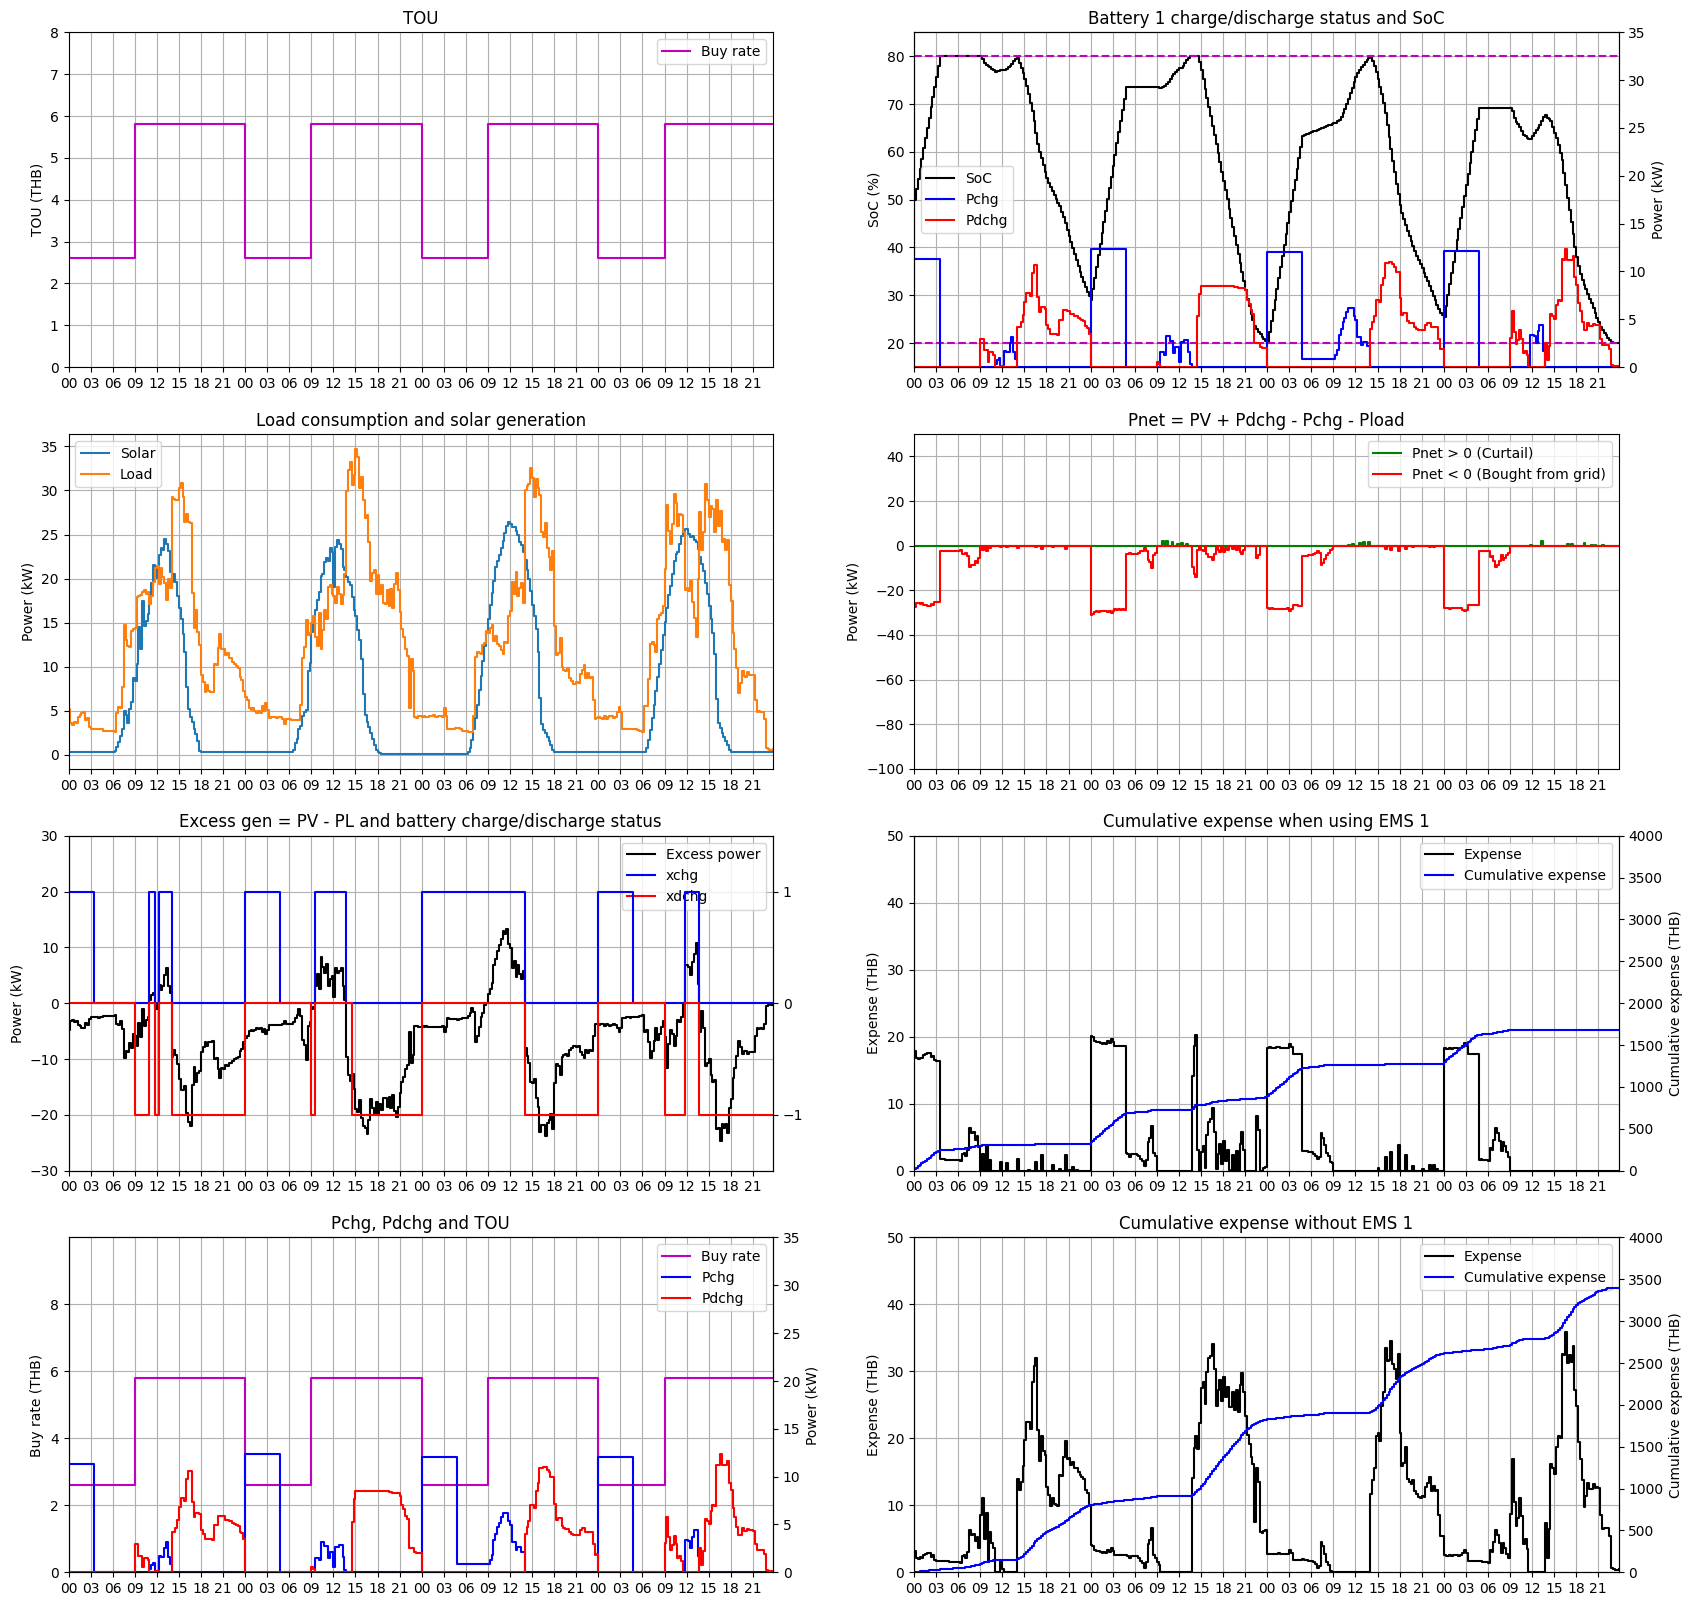

In [31]:
fig = EMS_energycost_plot(PARAM,sol)
# EMS_energyfromgrid_plot(PARAM,sol)
# EMS_profit_plot(PARAM,sol)
# EMS_AC_plot(PARAM,sol)
# EMS_RE_plot(PARAM,sol)
graph_path = 'graph/'
graph_name = 'test.pdf'
fig.savefig(graph_path+graph_name,bbox_inches='tight')